In [36]:
import pandas as pd
import numpy as np

# Homework #4


The howework is due May 23rd 11:59PM.

## 1. Bike sharing dataset

This is a dataset of bike sharing data from 2011 and 2012 from Washington D.C. and is 
publicly available in [here](http://capitalbikeshare.com/system-data). Read the [README](./data/bike_sharing/Readme.txt) for details.

For this question, construct  

* a decision tree model
* a random forest
* a XGBoost tree model

to predict

1. the weather situation ('weathersit' column) using other columns.
2. the number of bikes ('cnt' column) using other columns.

0.5168627266705401

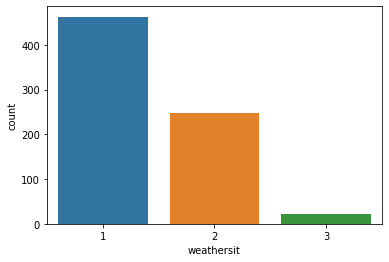

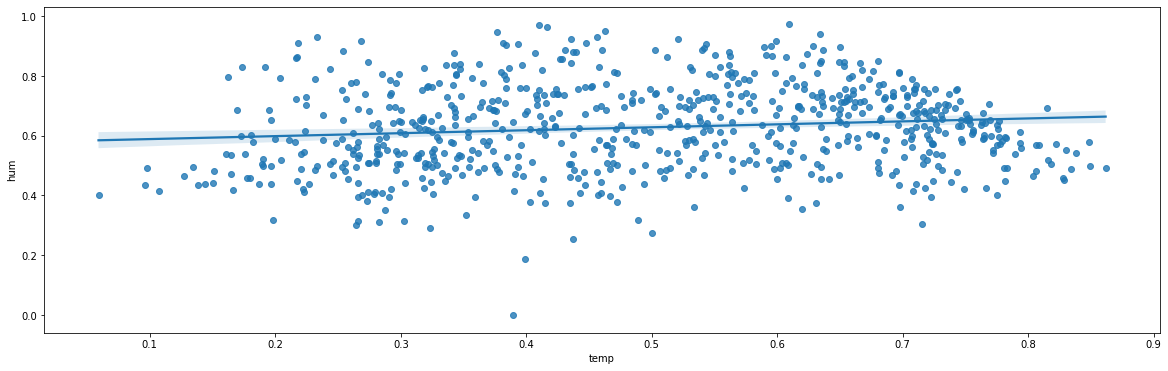

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor

bike = pd.read_csv('day.csv')

bike.dtypes
bike.describe()
bike.isnull().sum()
sns.countplot(x= "weathersit", data=bike)
bike= bike.drop(["instant", "dteday"], axis=1)

fig, (ax)= plt.subplots(ncols= 1, figsize= (20,6))
sns.regplot(x= bike["temp"], y=bike["hum"])

X= bike.drop('weathersit', axis= 1)
y= bike['weathersit']

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= 0.8, random_state= 30)


In [119]:
dt_model= DecisionTreeClassifier(max_depth= 10, max_leaf_nodes= 20, criterion= "gini")

dt_model.fit(X_train, y_train)

print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test, y_test))

0.8613013698630136
0.8163265306122449


In [148]:
rf_model= RandomForestClassifier(n_estimators= 50, max_depth= 5, max_leaf_nodes= 20)
rf_model.fit(X_train, y_train)

print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

0.6781384725921522
0.5093135430755003


In [121]:
xgb_model= XGBRegressor(n_estimators=20, max_depth= 1, eval_metric= "error", use_label_encoder= False)
xgb_model.fit(X_train, y_train)

print(xgb_model.score(X_train, y_train))
print(xgb_model.score(X_test, y_test))

0.5168627266705401
0.47316644409905523


In [145]:
bike1 = pd.read_csv('day.csv')

bike1= bike1.drop(["instant", "dteday"], axis=1)
X1= bike1.drop('cnt', axis= 1)
y1= bike1['cnt']
X1_train, X1_test, y1_train, y1_test= train_test_split(X1, y1, train_size= 0.8, random_state= 20)
dt_model= DecisionTreeClassifier(max_depth= 7, max_leaf_nodes= 20)
dt_model.fit(X1_train, y1_train)

print(dt_model.score(X1_train, y1_train))
print(dt_model.score(X1_test, y1_test))

0.04965753424657534
0.0


In [147]:
rf_model= RandomForestRegressor()
rf_model.fit(X1_train, y1_train)

print(rf_model.score(X1_train, y1_train))
print(rf_model.score(X1_test, y1_test))

0.9995006600732159
0.9964857859847945


In [124]:
xgb_model= XGBRegressor()
xgb_model.fit(X1_train, y1_train)

print(xgb_model.score(X1_train, y1_train))
print(xgb_model.score(X1_test, y1_test))

0.9999980587820615
0.994790788685812


## 2. Education datataset

This dataset is taken from [Kaggle](https://www.kaggle.com/spscientist/students-performance-in-exams). For this dataset, construct a decision tree regression and a XGBoost regression model to predict

1. math score
2. reading score
3. writing score

Beware: you might have to transform the data first before you train and test your models.

0.1375
0.04


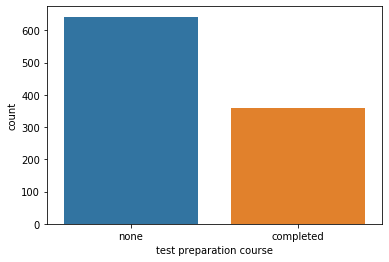

In [130]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor

education = pd.read_csv('StudentsPerformance.csv')

sns.countplot(x= "test preparation course", data=education)

education.dtypes

gender= pd.get_dummies(education["gender"], drop_first= True)
race_ethnicity= pd.get_dummies(education["race/ethnicity"], drop_first= True)
parental_level_of_education= pd.get_dummies(education["parental level of education"], drop_first= True)
lunch = pd.get_dummies(education["lunch"], drop_first= True)
test_preparation_course = pd.get_dummies(education["test preparation course"], drop_first= True)

parental_level_of_education.head()

education= pd.concat([education, gender, race_ethnicity, parental_level_of_education,
                     lunch, test_preparation_course], axis=1)

education.drop(["gender", "race/ethnicity", "parental level of education", "lunch",
               "test preparation course"], axis=1, inplace= True)

education.dtypes
#sns.heatmap(education.isnull(), yticklabels= False, cmap="viridis")

X1= education.drop('math score', axis= 1)
y1= education['math score']

X1_train, X1_test, y1_train, y1_test= train_test_split(X1, y1, test_size= 0.2, random_state= 20)

dtr1_model= DecisionTreeClassifier(max_depth= 10, max_leaf_nodes= 20)
dtr1_model.fit(X1_train, y1_train)

print(dtr1_model.score(X1_train, y1_train))
print(dtr1_model.score(X1_test, y1_test))

In [132]:
xg1_model= XGBRegressor(n_estimators=100, max_depth= 1)
xg1_model.fit(X1_train, y1_train)

print(xg1_model.score(X1_train, y1_train))
print(xg1_model.score(X1_test, y1_test))

0.8810921209552
0.8468818673096256


In [135]:

X2= education.drop('reading score', axis= 1)
y2= education['reading score']

X2_train, X2_test, y2_train, y2_test= train_test_split(X2, y2, test_size= 0.2, random_state= 20)

dtr2_model= DecisionTreeClassifier(max_depth= 30, max_leaf_nodes= 20)
dtr2_model.fit(X2_train, y2_train)

print(dtr2_model.score(X2_train, y2_train))
print(dtr2_model.score(X2_test, y2_test))

0.1875
0.06


In [137]:
xg2_model= XGBRegressor(n_estimators=20, max_depth= 1, eval_metric= "error", use_label_encoder= False)
xg2_model.fit(X2_train, y2_train)

print(xg2_model.score(X2_train, y2_train))
print(xg2_model.score(X2_test, y2_test))

0.9109251796526496
0.8891863459690257


In [140]:
X3= education.drop('writing score', axis= 1)
y3= education['writing score']

X3_train, X3_test, y3_train, y3_test= train_test_split(X3, y3, test_size= 0.2, random_state= 20)

dtr3_model= DecisionTreeClassifier(max_depth= 20, max_leaf_nodes= 20)
dtr3_model.fit(X3_train, y3_train)

print(dtr3_model.score(X3_train, y3_train))
print(dtr3_model.score(X3_test, y3_test))

0.1675
0.07


In [144]:
xg3_model= XGBRegressor()
xg3_model.fit(X3_train, y3_train)

print(xg2_model.score(X3_train, y3_train))
print(xg2_model.score(X3_test, y3_test))

0.8718392960651138
0.8531116970877198


# 3. booking.com Challenge

This dataset is taken from [Booking.com Challenge ACM WSDM 2021](https://www.bookingchallenge.com/).

The original challenge was to predict the final destination city of the trip by looking at the data at hand for each user. For this question, you are free to do whatever you like. Do something interesting with the data :)

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
booking = pd.read_csv('train_set.csv')

booking.drop(["checkout", "device_class", "utrip_id"], axis=1, inplace= True)

booking["checkin"]= pd.to_datetime(booking["checkin"])
booking["year"]= booking["checkin"].dt.year
booking["month"]= booking["checkin"].dt.month
booking["day"]= booking["checkin"].dt.day

booking.drop(["checkin", "year"], axis=1, inplace= True)

booker_country= pd.get_dummies(booking["booker_country"], drop_first= True)
hotel_country= pd.get_dummies(booking["hotel_country"], drop_first= True)
booking.drop(["booker_country", "hotel_country"], axis= 1, inplace= True)

booking= pd.concat([booker_country, hotel_country], axis= 1)

lg_model= LogisticRegression()

X= np.array(booking.drop(["city_id"], axis=1))
y= np.array(booking["city_id"])

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= 0.008, test_size= 0.002, random_state= 0)

lg_model.fit(X_train, y_train)
lg_model.score(X_train, y_train)

KeyError: "['city_id'] not found in axis"

## I was going to create a model and make various modifications according to the results, but I constantly got a city_id error.
